<a href="https://colab.research.google.com/github/CHUNGSEYEON991108/Credit12/blob/main/20240915_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#module

In [64]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
import tensorflow as tf
import matplotlib.pyplot as plt
from google.colab import drive
from tensorflow.keras.layers import Dense, Dropout

# Data Load

In [65]:
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/creditcard.csv'
data = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# EDA

In [66]:
data= data.astype(dtype='float32')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float32
 1   V1      284807 non-null  float32
 2   V2      284807 non-null  float32
 3   V3      284807 non-null  float32
 4   V4      284807 non-null  float32
 5   V5      284807 non-null  float32
 6   V6      284807 non-null  float32
 7   V7      284807 non-null  float32
 8   V8      284807 non-null  float32
 9   V9      284807 non-null  float32
 10  V10     284807 non-null  float32
 11  V11     284807 non-null  float32
 12  V12     284807 non-null  float32
 13  V13     284807 non-null  float32
 14  V14     284807 non-null  float32
 15  V15     284807 non-null  float32
 16  V16     284807 non-null  float32
 17  V17     284807 non-null  float32
 18  V18     284807 non-null  float32
 19  V19     284807 non-null  float32
 20  V20     284807 non-null  float32
 21  V21     28

# Train, Test 분리

In [80]:
# 1. X, y 분리
X= data.iloc[:, :-1]
Y= data.iloc[:, -1]
# print(X) # Time~Amount
# print(Y) # Class

# 2. train, test 분리
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 0)

for train_index, test_index in kfold.split(X, Y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

print(X_train.shape, y_train.shape) #(227846, 30) (227846,) 80%
print(X_test.shape, y_test.shape) #(56961, 30) (56961,) 20%
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

(227846, 30) (227846,)
(56961, 30) (56961,)


# Train, Test 시각화

In [68]:
import seaborn as sns
sns.scatterplot(X_train)
plt.show()

KeyboardInterrupt: 

# Hyperparameter

## learning_rate_decay 변경
    linear -> cosine -> inverse


In [82]:
# 1. 학습률
# 초기값 설정
initial_learning_rate = 0.01
decay_steps = 5 #
decay_rate = 0.95
epochs = np.arange(1, 101)

# Exponential Decay
exponential_decay = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=decay_steps, decay_rate=decay_rate)

# learning_rates_exp = [exponential_decay(epoch) for epoch in epochs]
# for epoch in range(100):  # 에포크 100번
#    learning_rate = learning_rates_exp[epoch]


# 2. 배치크기
batch_size = 2**12 #13만 #train 데이터의 약 50%크기


# model 구축

## 가중치 초기화

In [72]:
print(X_train.shape[1])

30


In [86]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

model = Sequential()

#가중치 초기화
weight_init = tf.keras.initializers.he_uniform()
# weight_init = tf.keras.initializaers.RandomNormal()
# weight_init = tf.keras.initializaers.glorot_uniform()

#model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(128, activation='relu', input_dim=30, kernel_initializer=weight_init))  # 첫 번째 은닉층
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))  # 두 번째 은닉층
model.add(Dropout(0.5))  # 50% 드롭아웃 적용
model.add(Dense(32, activation='relu'))  # 세 번째 은닉층
model.add(Dense(1, activation='sigmoid'))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_37 (Dense)                     │ (None, 128)                 │           3,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,337 (56.00 KB)

 Trainable params: 14,337 (56.00 KB)

 Non-trainable params: 0 (0.00 B)

# 최적화

In [84]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=exponential_decay),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

# Training

In [85]:
#생성된 데이터를 batch_size로 나누어, epoch만큼 학습시킴
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_train, y_train), batch_size = batch_size)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 9s 62ms/step - accuracy: 0.9542 - loss: 1128.9371 - val_accuracy: 0.9983 - val_loss: 19.7326
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9969 - loss: 33.2822 - val_accuracy: 0.9983 - val_loss: 0.5355
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9976 - loss: 7.8411 - val_accuracy: 0.9983 - val_loss: 0.4553
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9978 - loss: 5.7845 - val_accuracy: 0.9983 - val_loss: 0.4205
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9978 - loss: 4.4582 - val_accuracy: 0.9983 - val_loss: 0.4032
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9977 - loss: 7.6226 - val_accuracy: 0.9983 - val_loss: 0.3941
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9977 - loss: 4.1496 - val_accuracy: 0.9983 - val_loss: 0.3892
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9978 - loss: 3.2719 - val_accuracy: 0.9983 - val

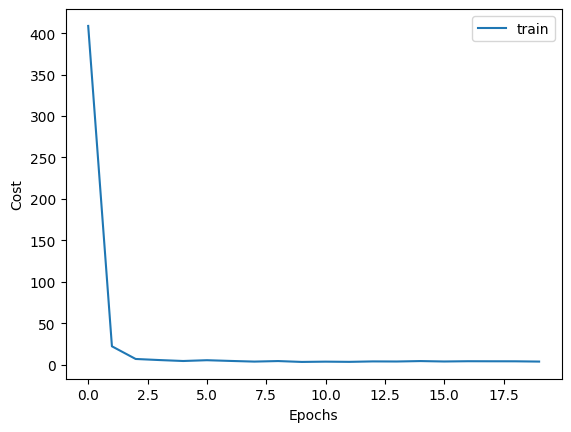

In [87]:
plt.plot(history.history['loss'], label = "train")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.legend()
plt.show()

# Model Evaluation

In [24]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("Test accuracy: ", test_acc)

NameError: name 'x_test' is not defined

# Test

In [23]:
predictions = model.predict(X_test, y_test)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

# accuracy 검증


In [ ]:
# confusion_matrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

cnf_matrix = confusion_matrix(y_actual, y_pred, labels = ['cat', 'dog', 'rabbit'])
np.set_printoptions(precision = 2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes = ['cat', 'dog', 'rabbit'], title = 'confusion matrix without normalization')
plt.show()

# 분류지표 계산
print(classification_report(y_train, y_train_pred))

# ROC(필요하면 쓰기)
from sklearn.metrics import roc_curve, auc
import pandas as pd

y_train_prob = lr.predict_proba(X_train)[:, 1]

fpr, tpr, threshold = roc_curve(y_train, y_train_prob)

a=pd.DataFrame()

a['fpr'] = 1-fpr
a['tpr'] = tpr
a['thres'] = threshold
# p(a)

import matplotlib.pyplot as plt

auc_score = auc(fpr, tpr)

plt.plot(fpr, tpr, label='auc: %.2f'%auc_score)
plt.show()

# Evaluation

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

# Visualization

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'], label = "train") #그래프모양 변경가능
plt.xlabel("Epochs") # 변수수정
plt.ylabel("Cost") #변수수정
plt.legend()
plt.show()